In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import  numpy as np
import os

In [2]:
img1=cv.imread("lena_color.tiff",0)
img1.shape

(512, 512)

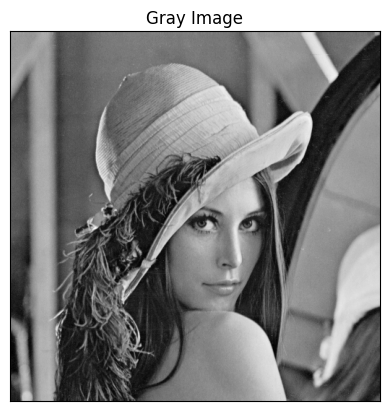

In [3]:
plt.imshow(img1,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title("Gray Image")
plt.show()


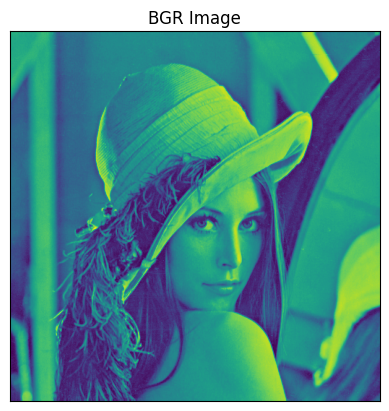

In [4]:
im=cv.imread("lena_color.tiff",0)
plt.imshow(im)
plt.xticks([])
plt.yticks([])
plt.title("BGR Image")
plt.show()


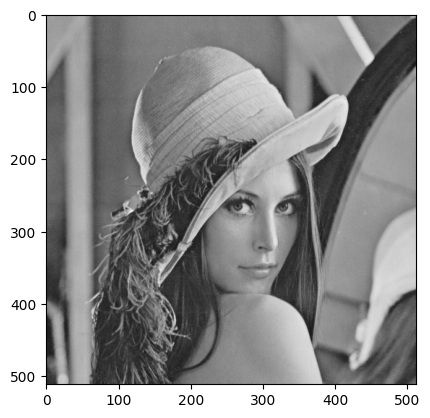

In [5]:
img=cv.cvtColor(img1,cv.COLOR_BGR2RGB)
plt.imshow(img)

In [7]:
imvector=list(img1.ravel())
gs=[x for x in range(256)]
fre=[]
for x in gs:
    fre.append(imvector.count(x))

In [62]:
# fre

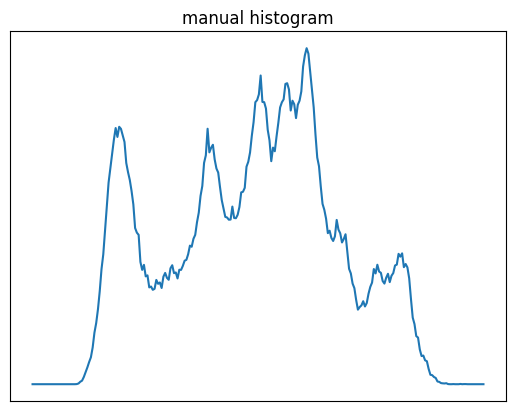

In [8]:
plt.plot(gs,fre)
plt.xticks([])
plt.yticks([])

plt.title("manual histogram")
plt.show()

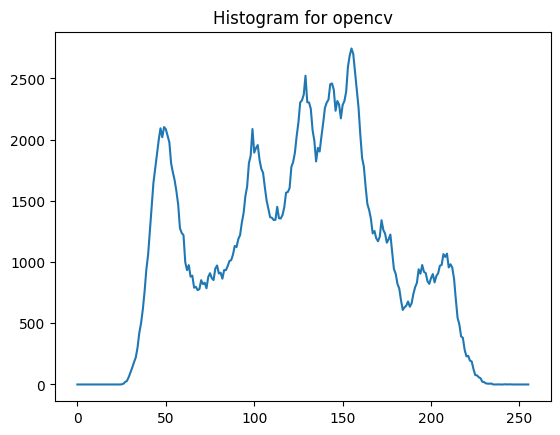

In [9]:
hist=cv.calcHist([im],[0],None,[256],[0,256])
plt.title("Histogram for opencv")
plt.plot(hist)
plt.show()

In [10]:
freq1=[]
for i in range(256):
    freq1.append(fre[i]/512*512)


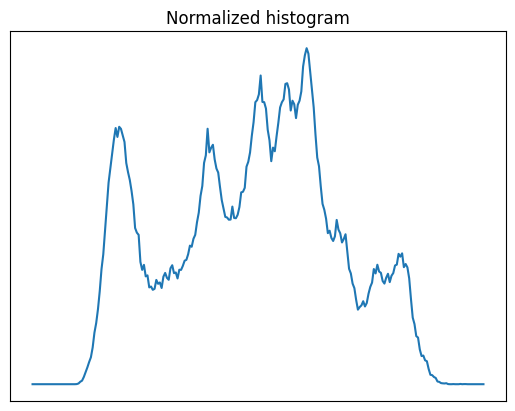

In [11]:
plt.plot(gs,freq1)
plt.xticks([])
plt.yticks([])

plt.title("Normalized histogram")
plt.show()

Sudipto

Entropy calculation

In [13]:
def calculate_entropy(image):
    hist = cv.calcHist([image], [0], None, [256], [0, 256])
    hist_normalized = hist / np.sum(hist)
    entropy = -np.sum(hist_normalized * np.log2(hist_normalized + 1e-10))
    return entropy

In [18]:
image_directory = 'CoverImages'
image_list = []

In [19]:
for filename in os.listdir(image_directory):
    if filename.endswith(('.jpg', '.png', '.jpeg', '.tiff')):
        image_path = os.path.join(image_directory, filename)
        img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
        
        entropy_value = calculate_entropy(img)
        image_list.append((filename, entropy_value))

In [20]:
sorted_image_list = sorted(image_list, key=lambda x: x[1])
for filename, entropy in sorted_image_list:
    print(f'Image: {filename}, Entropy: {entropy}')

Image: tank.tiff, Entropy: 5.495739936828613
Image: airplane.tiff, Entropy: 6.702443599700928
Image: fishingboat.tiff, Entropy: 7.191370487213135
Image: house.tiff, Entropy: 7.233404159545898
Image: splash.tiff, Entropy: 7.2534027099609375
Image: baboon.tiff, Entropy: 7.358314514160156
Image: lena.tiff, Entropy: 7.445040225982666
Image: sailboat.tiff, Entropy: 7.484290599822998
Image: elaine.tiff, Entropy: 7.505983352661133
Image: peeper.tiff, Entropy: 7.593601226806641


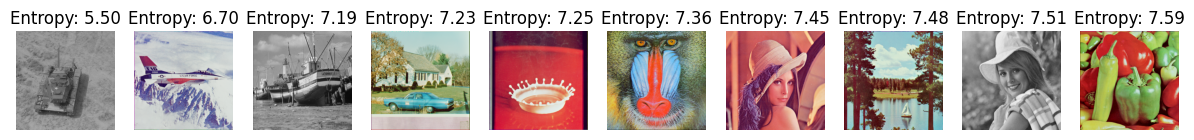

In [21]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv.imread(image_path)
    axes[i].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    axes[i].axis('off')
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()

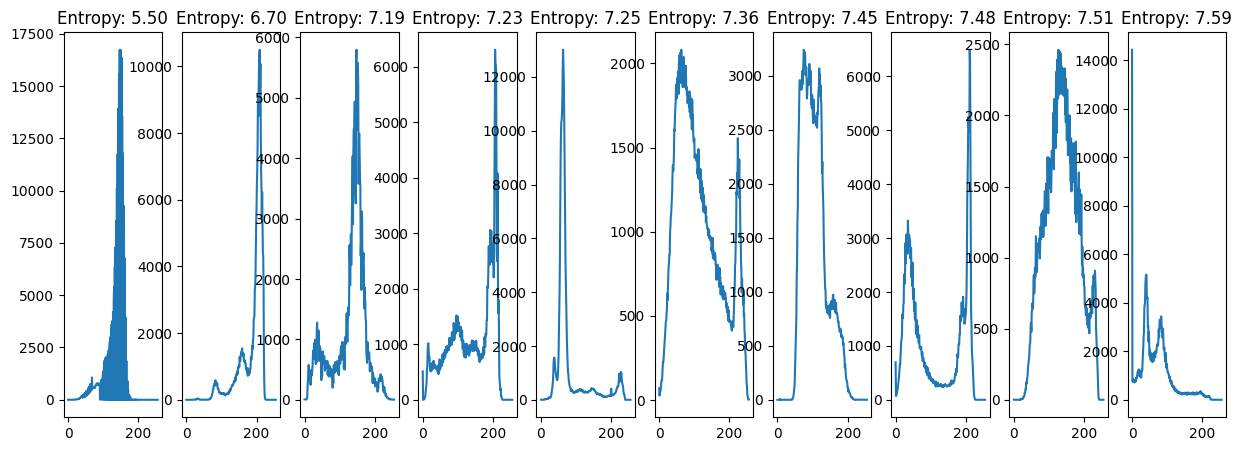

In [23]:
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))

for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv.imread(image_path)
    hist = cv.calcHist([img], [0], None, [256], [0, 256])
    axes[i].plot(hist)
    axes[i].axis()
    axes[i].set_title(f'Entropy: {entropy:.2f}')

plt.show()

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

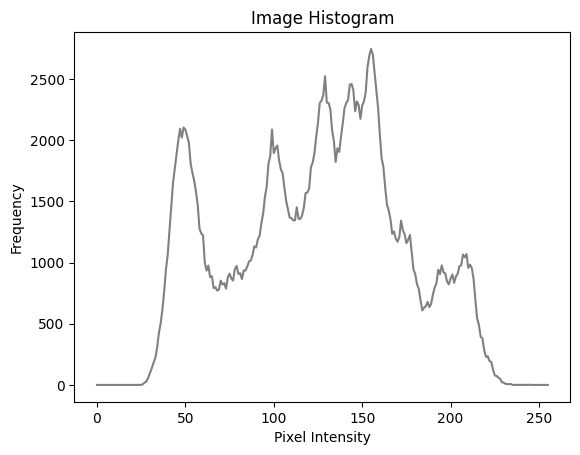

In [3]:


# Read the image
image = cv2.imread('CoverImages/lena.tiff', cv2.IMREAD_GRAYSCALE)

# Calculate histogram
histogram = cv2.calcHist([image], [0], None, [256], [0,256])

# Plot histogram
plt.plot(histogram, color='gray')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()


In [4]:
histogram_normalized = histogram / float(image.shape[0] * image.shape[1])


In [8]:
entropy = -np.sum(histogram_normalized * np.log2(histogram_normalized + 1e-10))
print("Entropy of the image:", entropy)


Entropy of the image: 7.44504


In [26]:
import os
image_directory = 'CoverImages'
image_files = os.listdir(image_directory)
image_paths = [os.path.join( file) for file in image_files]

print("Image paths:", image_paths)


Image paths: ['a.out', 'airplane.tiff', 'baboon.tiff', 'Barbara.tif', 'Cooking.mp4', 'elaine.tiff', 'fishingboat.tiff', 'frame.jpg.txt', 'Goldhill.tif', 'house.tiff', 'lena.pgm', 'lena.tiff', 'lena1.tiff', 'lenaneg.pgm', 'peeper.tiff', 'sailboat.tiff', 'splash.tiff', 'tank.tiff']


In [27]:

def calculate_entropy(image):
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])
    histogram_normalized = histogram / float(image.shape[0] * image.shape[1])
    entropy = -np.sum(histogram_normalized * np.log2(histogram_normalized + 1e-10))
    
    return entropy





In [28]:
def calculate_entropy_for_images_in_directory(directory):
    image_files = os.listdir(directory)
    image_files = [file for file in image_files if file.endswith('.tiff') or file.endswith('.tif')]
    image_paths = [os.path.join(directory, file) for file in image_files]
    
    entropies = []
    for image_path in image_paths:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        entropy = calculate_entropy(image)
        entropies.append((image_path, entropy))
        entropies.sort(key=lambda x: x[1])
    
    return entropies


In [31]:

image_directory = 'CoverImages'
sorted_entropies = calculate_entropy_for_images_in_directory(image_directory)
for i, (image_path, entropy) in enumerate(sorted_entropies):
    print(f"Image {i+1}: {image_path}, Entropy: {entropy}")


Image 1: CoverImages\tank.tiff, Entropy: 5.495739936828613
Image 2: CoverImages\airplane.tiff, Entropy: 6.702443599700928
Image 3: CoverImages\fishingboat.tiff, Entropy: 7.191370487213135
Image 4: CoverImages\house.tiff, Entropy: 7.233404159545898
Image 5: CoverImages\splash.tiff, Entropy: 7.2534027099609375
Image 6: CoverImages\baboon.tiff, Entropy: 7.358314514160156
Image 7: CoverImages\lena1.tiff, Entropy: 7.4432268142700195
Image 8: CoverImages\lena.tiff, Entropy: 7.445040225982666
Image 9: CoverImages\Barbara.tif, Entropy: 7.466426372528076
Image 10: CoverImages\Goldhill.tif, Entropy: 7.477779865264893
Image 11: CoverImages\sailboat.tiff, Entropy: 7.484290599822998
Image 12: CoverImages\elaine.tiff, Entropy: 7.505983352661133
Image 13: CoverImages\peeper.tiff, Entropy: 7.593601226806641


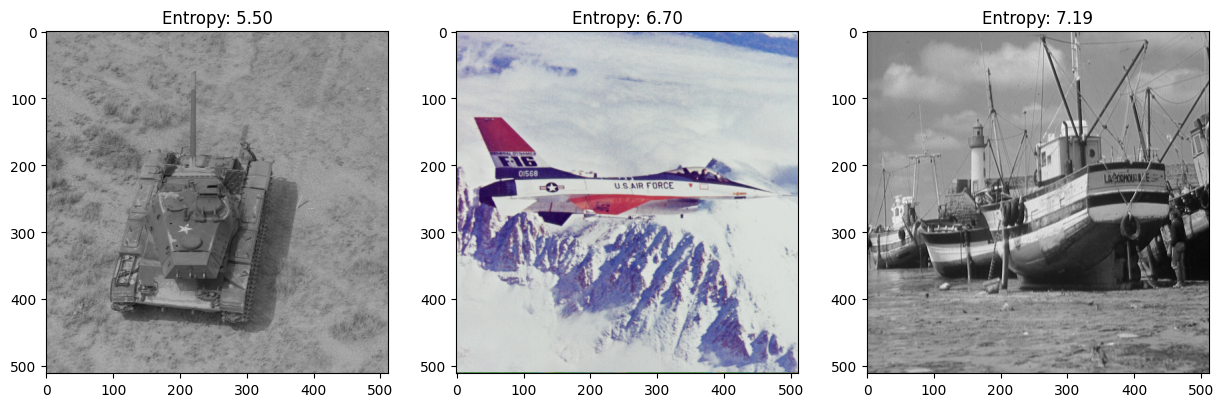

In [41]:

sorted_image_list = [('tank.tiff', 5.495739936828613), ('airplane.tiff', 6.702443599700928), ('fishingboat.tiff', 7.191370487213135)] 
fig, axes = plt.subplots(1, len(sorted_image_list), figsize=(15, 5))
for i, (filename, entropy) in enumerate(sorted_image_list):
    image_path = os.path.join(image_directory, filename)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axes[i].imshow(img)
    axes[i].set_title(f'Entropy: {entropy:.2f}')
plt.show()
